# Mini Project on Descriptive Analytics using file handling 

1. **Descriptive Analysis**

`Analyze the distribution of movie ratings. What percentage of movies have high (5), medium (3-4), and low (1-2) ratings?`

`Identify the top 10 most-rated movies`


2. **Genre Insights**

`Which movie genres are the most frequently rated?`

`Compare the average ratings across different genres. Are certain genres consistently rated higher or lower?`

3. **User Engagement Analysis**

`Identify the most active users (profession) based on the number of ratings they’ve given.`

`Analyze the relationship between user demographic attributes (age, gender, occupation) and their movie preferences or rating patterns.`


4. **Rating Distribution by Demographics**

`Investigate how ratings vary by user demographic attributes (age, gender, occupation).`

`Are there specific genres preferred by certain age groups or occupations?`


5. **Top Performers**

`Identify the movies with the highest average ratings (considering a minimum number of ratings for fairness).`

`Analyze the characteristics of top-rated movies (e.g., release year, genres).`


6. **Exploring Long Tail**

`Investigate the "long tail" of the dataset: How many movies receive very few ratings?`

`What are the characteristics of these less-rated movies compared to popular ones?`


7. **Tag Analysis**

`Analyze the tags associated with movies. What are the most frequently used tags?`

`Are tags consistent with movie genres?`

## You can do for self learning

8. **Visualization Projects**

`Create dashboards to visualize:`

`The distribution of ratings by genres and years.`

`Popular genres by user demographics.`

`Heatmaps showing the correlation between genres, user activity, and ratings`

In [1]:
# First Solution - Descriptive Analysys

ratings = open(r'C:\Users\rajat\Downloads\ml-1m\ml-1m\ratings.dat')
rating_distribution = dict()
movieId_count = dict()

for line in ratings:
    line = line.strip()
    columns = list(map(int, line.split('::')))
    if columns[2] == 5:
        columns.append('High')
    elif columns[2] == 4 or columns[2] == 3:
        columns.append('Medium')
    else:
        columns.append('Low')

    if columns[1] in movieId_count:
        movieId_count[columns[1]] += 1
    else: 
        movieId_count[columns[1]] = 1

    if columns[4] in rating_distribution:
        rating_distribution[columns[4]] += 1
    else:
        rating_distribution[columns[4]] = 1

for rating_range in rating_distribution:
    print('{0} {1}'.format(rating_range, int(rating_distribution[rating_range] / sum(rating_distribution.values()) * 100)))

movies = open(r'C:\Users\rajat\Downloads\ml-1m\ml-1m\movies.dat')
movieId_name = dict()
for line in movies:
    line = line.strip()
    columns = line.split('::')
    movieId_name[int(columns[0])] = columns[1]
    
sorted_counted_data = sorted(movieId_count.items(), key = lambda x:x[1], reverse=True)[:10]
for movieId, count in sorted_counted_data:
    print(movieId_name[movieId], count)

High 22
Medium 61
Low 16
American Beauty (1999) 3428
Star Wars: Episode IV - A New Hope (1977) 2991
Star Wars: Episode V - The Empire Strikes Back (1980) 2990
Star Wars: Episode VI - Return of the Jedi (1983) 2883
Jurassic Park (1993) 2672
Saving Private Ryan (1998) 2653
Terminator 2: Judgment Day (1991) 2649
Matrix, The (1999) 2590
Back to the Future (1985) 2583
Silence of the Lambs, The (1991) 2578


In [8]:
#Second Solution : Genre Insights

# File paths
ratings_file = r'C:\Users\rajat\Downloads\ml-1m\ml-1m\ratings.dat'
movies_file = r'C:\Users\rajat\Downloads\ml-1m\ml-1m\movies.dat'

# Step 1: Load ratings data into a dictionary
movie_ratings = {}

# Open the ratings file and process line by line
with open(ratings_file, 'r') as file:
    for line in file:
        # Split the line into parts
        _, movie_id, rating, _ = line.strip().split('::')
        movie_id = int(movie_id)
        rating = float(rating)

        # Add ratings to the dictionary for each movie
        if movie_id not in movie_ratings:
            movie_ratings[movie_id] = []
        movie_ratings[movie_id].append(rating)

# Step 2: Load movies data and calculate genre-wise ratings
genre_ratings = {}

# Open the movies file and process line by line
with open(movies_file, 'r') as file:
    for line in file:
        # Split the line into parts
        movie_id, _, genres = line.strip().split('::')
        movie_id = int(movie_id)
        genre_list = genres.split('|')

        # Skip movies without ratings
        if movie_id not in movie_ratings:
            continue

        # Aggregate ratings for each genre
        for genre in genre_list:
            if genre not in genre_ratings:
                genre_ratings[genre] = {"total_ratings": 0, "rating_sum": 0}
            genre_ratings[genre]["total_ratings"] += len(movie_ratings[movie_id])
            genre_ratings[genre]["rating_sum"] += sum(movie_ratings[movie_id])

# Step 3: Calculate average ratings for each genre
print("Genre-wise Rating Analysis:")
for genre, data in genre_ratings.items():
    total_ratings = data["total_ratings"]
    rating_sum = data["rating_sum"]
    average_rating = rating_sum / total_ratings
    print(f"{genre}: {total_ratings} ratings, Average rating: {average_rating:.2f}")

Genre-wise Rating Analysis:
Animation: 43293 ratings, Average rating: 3.68
Children's: 72186 ratings, Average rating: 3.42
Comedy: 356580 ratings, Average rating: 3.52
Adventure: 133953 ratings, Average rating: 3.48
Fantasy: 36301 ratings, Average rating: 3.45
Romance: 147523 ratings, Average rating: 3.61
Drama: 354529 ratings, Average rating: 3.77
Action: 257457 ratings, Average rating: 3.49
Crime: 79541 ratings, Average rating: 3.71
Thriller: 189680 ratings, Average rating: 3.57
Horror: 76386 ratings, Average rating: 3.22
Sci-Fi: 157294 ratings, Average rating: 3.47
Documentary: 7910 ratings, Average rating: 3.93
War: 68527 ratings, Average rating: 3.89
Musical: 41533 ratings, Average rating: 3.67
Mystery: 40178 ratings, Average rating: 3.67
Film-Noir: 18261 ratings, Average rating: 4.08
Western: 20683 ratings, Average rating: 3.64


In [9]:
#Third Solution : User Engagement Analysis

# File paths
ratings_file = r'C:\Users\rajat\Downloads\ml-1m\ml-1m\ratings.dat'
users_file = r'C:\Users\rajat\Downloads\ml-1m\ml-1m\users.dat'

# Step 1: Count Ratings per User
user_ratings = {}

# Open the ratings file and process each line
with open(ratings_file, 'r') as file:
    for line in file:
        # Split the line into user_id, movie_id, rating, timestamp
        user_id, _, _, _ = line.strip().split('::')
        user_id = int(user_id)
        
        # Update the count of ratings for each user
        if user_id not in user_ratings:
            user_ratings[user_id] = 0
        user_ratings[user_id] += 1

# Step 2: Load User Demographics
user_data = {}

# Open the users file and process each line
with open(users_file, 'r') as file:
    for line in file:
        # Split the line into user_id, gender, age, occupation, zip_code
        user_id, gender, age, occupation, _ = line.strip().split('::')
        user_id = int(user_id)
        age = int(age)
        occupation = int(occupation)
        
        # Store demographic details for each user
        user_data[user_id] = {"Gender": gender, "Age": age, "Occupation": occupation}

# Step 3: Analyze Engagement by Occupation
occupation_ratings = {}

for user_id, rating_count in user_ratings.items():
    if user_id in user_data:
        occupation = user_data[user_id]["Occupation"]
        if occupation not in occupation_ratings:
            occupation_ratings[occupation] = 0
        occupation_ratings[occupation] += rating_count

# Step 4: Analyze Engagement by Gender and Age
gender_ratings = {"M": 0, "F": 0}
age_ratings = {}

for user_id, rating_count in user_ratings.items():
    if user_id in user_data:
        gender = user_data[user_id]["Gender"]
        age = user_data[user_id]["Age"]
        
        # Update gender-based ratings
        gender_ratings[gender] += rating_count
        
        # Update age-based ratings
        if age not in age_ratings:
            age_ratings[age] = 0
        age_ratings[age] += rating_count

# Step 5: Print Results
print("Most Active Occupations:")
for occupation, count in sorted(occupation_ratings.items(), key=lambda x: x[1], reverse=True):
    print(f"Occupation {occupation}: {count} ratings")

print("\nRatings by Gender:")
for gender, count in gender_ratings.items():
    print(f"{gender}: {count} ratings")

print("\nRatings by Age:")
for age, count in sorted(age_ratings.items()):
    print(f"Age {age}: {count} ratings")


Most Active Occupations:
Occupation 4: 131032 ratings
Occupation 0: 130499 ratings
Occupation 7: 105425 ratings
Occupation 1: 85351 ratings
Occupation 17: 72816 ratings
Occupation 20: 60397 ratings
Occupation 12: 57214 ratings
Occupation 2: 50068 ratings
Occupation 14: 49109 ratings
Occupation 16: 46021 ratings
Occupation 6: 37205 ratings
Occupation 3: 31623 ratings
Occupation 10: 23290 ratings
Occupation 15: 22951 ratings
Occupation 5: 21850 ratings
Occupation 11: 20563 ratings
Occupation 19: 14904 ratings
Occupation 13: 13754 ratings
Occupation 18: 12086 ratings
Occupation 9: 11345 ratings
Occupation 8: 2706 ratings

Ratings by Gender:
M: 753769 ratings
F: 246440 ratings

Ratings by Age:
Age 1: 27211 ratings
Age 18: 183536 ratings
Age 25: 395556 ratings
Age 35: 199003 ratings
Age 45: 83633 ratings
Age 50: 72490 ratings
Age 56: 38780 ratings


In [9]:
#Forth Solution : Rating Distribution by Demographics

# Step 1: Open and read the files
users_file = open(r'C:\Users\rajat\Downloads\ml-1m\ml-1m\users.dat', 'r')
ratings_file = open(r'C:\Users\rajat\Downloads\ml-1m\ml-1m\ratings.dat', 'r')
movies_file = open(r'C:\Users\rajat\Downloads\ml-1m\ml-1m\movies.dat', 'r')

# Step 2: Parse data into dictionaries for easy access
users = {}
for line in users_file:
    parts = line.strip().split('::')
    user_id, gender, age, occupation = int(parts[0]), parts[1], int(parts[2]), int(parts[3])
    users[user_id] = {'Gender': gender, 'Age': age, 'Occupation': occupation}

ratings = []
for line in ratings_file:
    parts = line.strip().split('::')
    user_id, movie_id, rating = int(parts[0]), int(parts[1]), int(parts[2])
    ratings.append({'UserID': user_id, 'MovieID': movie_id, 'Rating': rating})

movies = {}
for line in movies_file:
    parts = line.strip().split('::')
    movie_id, title, genres = int(parts[0]), parts[1], parts[2]
    movies[movie_id] = {'Title': title, 'Genres': genres}

# Step 3: Close the files
users_file.close()
ratings_file.close()
movies_file.close()

# Step 4: Analyze rating distribution by demographics
# Dictionary to store rating distribution by age and occupation
age_group_ratings = {}
occupation_genre_preferences = {}

for rating in ratings:
    user_id = rating['UserID']
    movie_id = rating['MovieID']
    user = users[user_id]
    movie = movies[movie_id]

    # Extract demographic information
    age = user['Age']
    occupation = user['Occupation']
    genres = movie['Genres'].split('|')

    # Update ratings by age group
    if age not in age_group_ratings:
        age_group_ratings[age] = {'TotalRatings': 0, 'SumRatings': 0}
    age_group_ratings[age]['TotalRatings'] += 1
    age_group_ratings[age]['SumRatings'] += rating['Rating']

    # Update genre preferences by occupation
    if occupation not in occupation_genre_preferences:
        occupation_genre_preferences[occupation] = {}
    for genre in genres:
        if genre not in occupation_genre_preferences[occupation]:
            occupation_genre_preferences[occupation][genre] = 0
        occupation_genre_preferences[occupation][genre] += 1

# Step 5: Display results
print("\n--- Average Ratings by Age Group ---")
for age, stats in age_group_ratings.items():
    avg_rating = stats['SumRatings'] / stats['TotalRatings']
    print(f"Age Group {age}: Average Rating = {avg_rating:.2f}")

print("\n--- Genre Preferences by Occupation ---")
for occupation, genre_stats in occupation_genre_preferences.items():
    sorted_genres = sorted(genre_stats.items(), key=lambda x: x[1], reverse=True)[:5]
    print(f"Occupation {occupation}: Top Genres = {[genre for genre, count in sorted_genres]}")



--- Average Ratings by Age Group ---
Age Group 1: Average Rating = 3.55
Age Group 56: Average Rating = 3.77
Age Group 25: Average Rating = 3.55
Age Group 45: Average Rating = 3.64
Age Group 50: Average Rating = 3.71
Age Group 35: Average Rating = 3.62
Age Group 18: Average Rating = 3.51

--- Genre Preferences by Occupation ---
Occupation 10: Top Genres = ['Comedy', 'Action', 'Drama', 'Thriller', 'Sci-Fi']
Occupation 16: Top Genres = ['Drama', 'Comedy', 'Action', 'Thriller', 'Sci-Fi']
Occupation 15: Top Genres = ['Drama', 'Comedy', 'Action', 'Thriller', 'Sci-Fi']
Occupation 7: Top Genres = ['Drama', 'Comedy', 'Action', 'Thriller', 'Sci-Fi']
Occupation 20: Top Genres = ['Drama', 'Comedy', 'Action', 'Thriller', 'Romance']
Occupation 9: Top Genres = ['Comedy', 'Drama', 'Romance', 'Action', 'Thriller']
Occupation 1: Top Genres = ['Drama', 'Comedy', 'Action', 'Thriller', 'Romance']
Occupation 12: Top Genres = ['Comedy', 'Drama', 'Action', 'Sci-Fi', 'Thriller']
Occupation 17: Top Genres = ['

In [3]:
#Fifth Solution : Top Performers

# Step 1: Open and read the files
movies_file = open(r'C:\Users\rajat\Downloads\ml-1m\ml-1m\movies.dat', 'r')
ratings_file = open(r'C:\Users\rajat\Downloads\ml-1m\ml-1m\ratings.dat', 'r')

# Step 2: Parse data into dictionaries
movies = {}
for line in movies_file:
    parts = line.strip().split('::')
    movie_id, title, genres = int(parts[0]), parts[1], parts[2]
    movies[movie_id] = {'Title': title, 'Genres': genres}

ratings = {}
rating_counts = {}
for line in ratings_file:
    parts = line.strip().split('::')
    movie_id, rating = int(parts[1]), int(parts[2])

    # Update rating sums and counts for each movie
    if movie_id not in ratings:
        ratings[movie_id] = 0
        rating_counts[movie_id] = 0
    ratings[movie_id] += rating
    rating_counts[movie_id] += 1

# Step 3: Close the files
movies_file.close()
ratings_file.close()

# Step 4: Compute average ratings and filter by minimum number of ratings
MIN_RATINGS = 50
top_movies = []
for movie_id in ratings:
    if rating_counts[movie_id] >= MIN_RATINGS:
        avg_rating = ratings[movie_id] / rating_counts[movie_id]
        top_movies.append((movie_id, avg_rating))

# Sort movies by average rating in descending order
top_movies = sorted(top_movies, key=lambda x: x[1], reverse=True)[:10]

# Step 5: Display the top-rated movies and their characteristics
print("\n--- Top-Rated Movies ---")
for movie_id, avg_rating in top_movies:
    title = movies[movie_id]['Title']
    genres = movies[movie_id]['Genres']
    print(f"Title: {title}, Average Rating: {avg_rating:.2f}, Genres: {genres}")



--- Top-Rated Movies ---
Title: Sanjuro (1962), Average Rating: 4.61, Genres: Action|Adventure
Title: Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954), Average Rating: 4.56, Genres: Action|Drama
Title: Shawshank Redemption, The (1994), Average Rating: 4.55, Genres: Drama
Title: Godfather, The (1972), Average Rating: 4.52, Genres: Action|Crime|Drama
Title: Close Shave, A (1995), Average Rating: 4.52, Genres: Animation|Comedy|Thriller
Title: Usual Suspects, The (1995), Average Rating: 4.52, Genres: Crime|Thriller
Title: Schindler's List (1993), Average Rating: 4.51, Genres: Drama|War
Title: Wrong Trousers, The (1993), Average Rating: 4.51, Genres: Animation|Comedy
Title: Sunset Blvd. (a.k.a. Sunset Boulevard) (1950), Average Rating: 4.49, Genres: Film-Noir
Title: Raiders of the Lost Ark (1981), Average Rating: 4.48, Genres: Action|Adventure


In [4]:
#Sixth Solution : Long Tail Analysis

# Step 1: Open and read the files
ratings_file = open(r'C:\Users\rajat\Downloads\ml-1m\ml-1m\ratings.dat', 'r')
movies_file = open(r'C:\Users\rajat\Downloads\ml-1m\ml-1m\movies.dat', 'r')

# Step 2: Parse data into dictionaries
# Dictionary to count ratings for each movie
movie_rating_counts = {}

# Dictionary to store movie details
movies = {}
for line in movies_file:
    parts = line.strip().split('::')
    movie_id, title, genres = int(parts[0]), parts[1], parts[2]
    movies[movie_id] = {'Title': title, 'Genres': genres}

for line in ratings_file:
    parts = line.strip().split('::')
    movie_id = int(parts[1])
    if movie_id not in movie_rating_counts:
        movie_rating_counts[movie_id] = 0
    movie_rating_counts[movie_id] += 1

# Step 3: Close the files
ratings_file.close()
movies_file.close()

# Step 4: Analyze long tail
# Threshold for "few ratings"
threshold = 5

# Separate long-tail and popular movies
long_tail_movies = [movie_id for movie_id, count in movie_rating_counts.items() if count < threshold]
popular_movies = [movie_id for movie_id, count in movie_rating_counts.items() if count >= threshold]

# Analyze characteristics
def analyze_movies(movie_ids, description):
    genres_count = {}
    total_movies = len(movie_ids)

    for movie_id in movie_ids:
        if movie_id in movies:
            genres = movies[movie_id]['Genres'].split('|')
            for genre in genres:
                if genre not in genres_count:
                    genres_count[genre] = 0
                genres_count[genre] += 1

    print(f"\n--- {description} ---")
    print(f"Number of Movies: {total_movies}")
    sorted_genres = sorted(genres_count.items(), key=lambda x: x[1], reverse=True)
    print("Top Genres:", sorted_genres[:5])

# Step 5: Display results
analyze_movies(long_tail_movies, "Long Tail Movies (Few Ratings)")
analyze_movies(popular_movies, "Popular Movies (Many Ratings)")

# Step 6: Compare Rating Counts
print("\n--- Overall Comparison ---")
print(f"Total Movies: {len(movie_rating_counts)}")
print(f"Movies with Few Ratings (<{threshold}): {len(long_tail_movies)} ({len(long_tail_movies)/len(movie_rating_counts)*100:.2f}%)")
print(f"Movies with Many Ratings (≥{threshold}): {len(popular_movies)} ({len(popular_movies)/len(movie_rating_counts)*100:.2f}%)")


# Step 1: Open and read the files
ratings_file = open(r'C:\Users\rajat\Downloads\ml-1m\ml-1m\ratings.dat', 'r')
movies_file = open(r'C:\Users\rajat\Downloads\ml-1m\ml-1m\movies.dat', 'r')
users_file = open(r'C:\Users\rajat\Downloads\ml-1m\ml-1m\users.dat', 'r')

# Step 2: Parse data into dictionaries
movies = {}  # Store genres for each movie
for line in movies_file:
    parts = line.strip().split('::')
    movie_id, title, genres = int(parts[0]), parts[1], parts[2]
    movies[movie_id] = genres.split('|')  # Split genres by "|"

users = {}  # Store demographic info for each user
for line in users_file:
    parts = line.strip().split('::')
    user_id, gender, age, occupation = int(parts[0]), parts[1], int(parts[2]), int(parts[3])
    users[user_id] = {'Gender': gender, 'Age': age, 'Occupation': occupation}

ratings = []  # Store user-movie ratings
for line in ratings_file:
    parts = line.strip().split('::')
    user_id, movie_id, rating = int(parts[0]), int(parts[1]), int(parts[2])
    ratings.append({'UserID': user_id, 'MovieID': movie_id, 'Rating': rating})

# Step 3: Close the files
ratings_file.close()
movies_file.close()
users_file.close()

# Step 4: Analyze genre frequency
genre_count = {}
genre_by_age = {}

for rating in ratings:
    user_id = rating['UserID']
    movie_id = rating['MovieID']
    if movie_id in movies:
        genres = movies[movie_id]
        age = users[user_id]['Age']

        # Count genres
        for genre in genres:
            if genre not in genre_count:
                genre_count[genre] = 0
            genre_count[genre] += 1

            # Track genres by age group
            if age not in genre_by_age:
                genre_by_age[age] = {}
            if genre not in genre_by_age[age]:
                genre_by_age[age][genre] = 0
            genre_by_age[age][genre] += 1

# Step 5: Display results
print("\n--- Most Frequently Rated Genres ---")
sorted_genres = sorted(genre_count.items(), key=lambda x: x[1], reverse=True)[:10]
for genre, count in sorted_genres:
    print(f"Genre: {genre}, Frequency: {count}")

print("\n--- Genre Popularity by Age Group ---")
for age, genres in genre_by_age.items():
    sorted_genres = sorted(genres.items(), key=lambda x: x[1], reverse=True)[:5]
    print(f"Age Group {age}: Top Genres = {[genre for genre, count in sorted_genres]}")



--- Long Tail Movies (Few Ratings) ---
Number of Movies: 290
Top Genres: [('Drama', 155), ('Comedy', 73), ('Documentary', 26), ('Thriller', 18), ('Romance', 18)]

--- Popular Movies (Many Ratings) ---
Number of Movies: 3416
Top Genres: [('Drama', 1338), ('Comedy', 1090), ('Action', 480), ('Thriller', 467), ('Romance', 441)]

--- Overall Comparison ---
Total Movies: 3706
Movies with Few Ratings (<5): 290 (7.83%)
Movies with Many Ratings (≥5): 3416 (92.17%)

--- Most Frequently Rated Genres ---
Genre: Comedy, Frequency: 356580
Genre: Drama, Frequency: 354529
Genre: Action, Frequency: 257457
Genre: Thriller, Frequency: 189680
Genre: Sci-Fi, Frequency: 157294
Genre: Romance, Frequency: 147523
Genre: Adventure, Frequency: 133953
Genre: Crime, Frequency: 79541
Genre: Horror, Frequency: 76386
Genre: Children's, Frequency: 72186

--- Genre Popularity by Age Group ---
Age Group 1: Top Genres = ['Comedy', 'Drama', 'Action', 'Thriller', "Children's"]
Age Group 56: Top Genres = ['Drama', 'Comedy'

In [5]:
#Seventh Solution : Tag Analysis

# Step 1: Open and read the files
ratings_file = open(r'C:\Users\rajat\Downloads\ml-1m\ml-1m\ratings.dat', 'r')
movies_file = open(r'C:\Users\rajat\Downloads\ml-1m\ml-1m\movies.dat', 'r')
users_file = open(r'C:\Users\rajat\Downloads\ml-1m\ml-1m\users.dat', 'r')

# Step 2: Parse data into dictionaries
movies = {}  # Store genres for each movie
for line in movies_file:
    parts = line.strip().split('::')
    movie_id, title, genres = int(parts[0]), parts[1], parts[2]
    movies[movie_id] = genres.split('|')  # Split genres by "|"

users = {}  # Store demographic info for each user
for line in users_file:
    parts = line.strip().split('::')
    user_id, gender, age, occupation = int(parts[0]), parts[1], int(parts[2]), int(parts[3])
    users[user_id] = {'Gender': gender, 'Age': age, 'Occupation': occupation}

ratings = []  # Store user-movie ratings
for line in ratings_file:
    parts = line.strip().split('::')
    user_id, movie_id, rating = int(parts[0]), int(parts[1]), int(parts[2])
    ratings.append({'UserID': user_id, 'MovieID': movie_id, 'Rating': rating})

# Step 3: Close the files
ratings_file.close()
movies_file.close()
users_file.close()

# Step 4: Analyze genre frequency
genre_count = {}
genre_by_age = {}

for rating in ratings:
    user_id = rating['UserID']
    movie_id = rating['MovieID']
    if movie_id in movies:
        genres = movies[movie_id]
        age = users[user_id]['Age']

        # Count genres
        for genre in genres:
            if genre not in genre_count:
                genre_count[genre] = 0
            genre_count[genre] += 1

            # Track genres by age group
            if age not in genre_by_age:
                genre_by_age[age] = {}
            if genre not in genre_by_age[age]:
                genre_by_age[age][genre] = 0
            genre_by_age[age][genre] += 1

# Step 5: Display results
print("\n--- Most Frequently Rated Genres ---")
sorted_genres = sorted(genre_count.items(), key=lambda x: x[1], reverse=True)[:10]
for genre, count in sorted_genres:
    print(f"Genre: {genre}, Frequency: {count}")

print("\n--- Genre Popularity by Age Group ---")
for age, genres in genre_by_age.items():
    sorted_genres = sorted(genres.items(), key=lambda x: x[1], reverse=True)[:5]
    print(f"Age Group {age}: Top Genres = {[genre for genre, count in sorted_genres]}")



--- Most Frequently Rated Genres ---
Genre: Comedy, Frequency: 356580
Genre: Drama, Frequency: 354529
Genre: Action, Frequency: 257457
Genre: Thriller, Frequency: 189680
Genre: Sci-Fi, Frequency: 157294
Genre: Romance, Frequency: 147523
Genre: Adventure, Frequency: 133953
Genre: Crime, Frequency: 79541
Genre: Horror, Frequency: 76386
Genre: Children's, Frequency: 72186

--- Genre Popularity by Age Group ---
Age Group 1: Top Genres = ['Comedy', 'Drama', 'Action', 'Thriller', "Children's"]
Age Group 56: Top Genres = ['Drama', 'Comedy', 'Action', 'Thriller', 'Romance']
Age Group 25: Top Genres = ['Comedy', 'Drama', 'Action', 'Thriller', 'Sci-Fi']
Age Group 45: Top Genres = ['Drama', 'Comedy', 'Action', 'Thriller', 'Romance']
Age Group 50: Top Genres = ['Drama', 'Comedy', 'Action', 'Thriller', 'Romance']
Age Group 35: Top Genres = ['Drama', 'Comedy', 'Action', 'Thriller', 'Sci-Fi']
Age Group 18: Top Genres = ['Comedy', 'Drama', 'Action', 'Thriller', 'Sci-Fi']


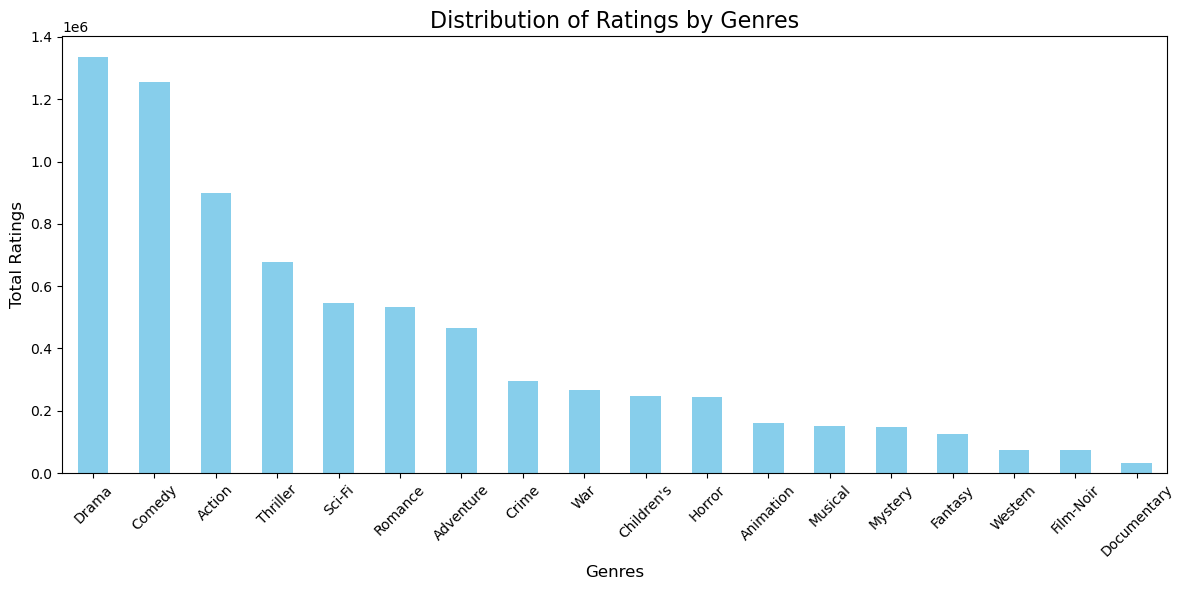

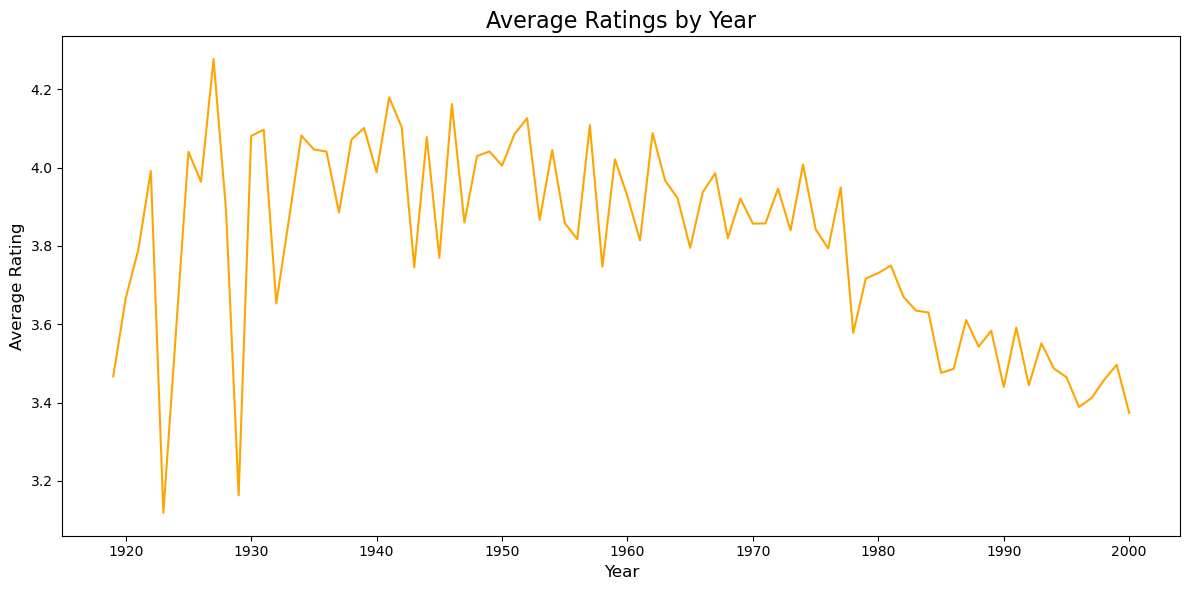

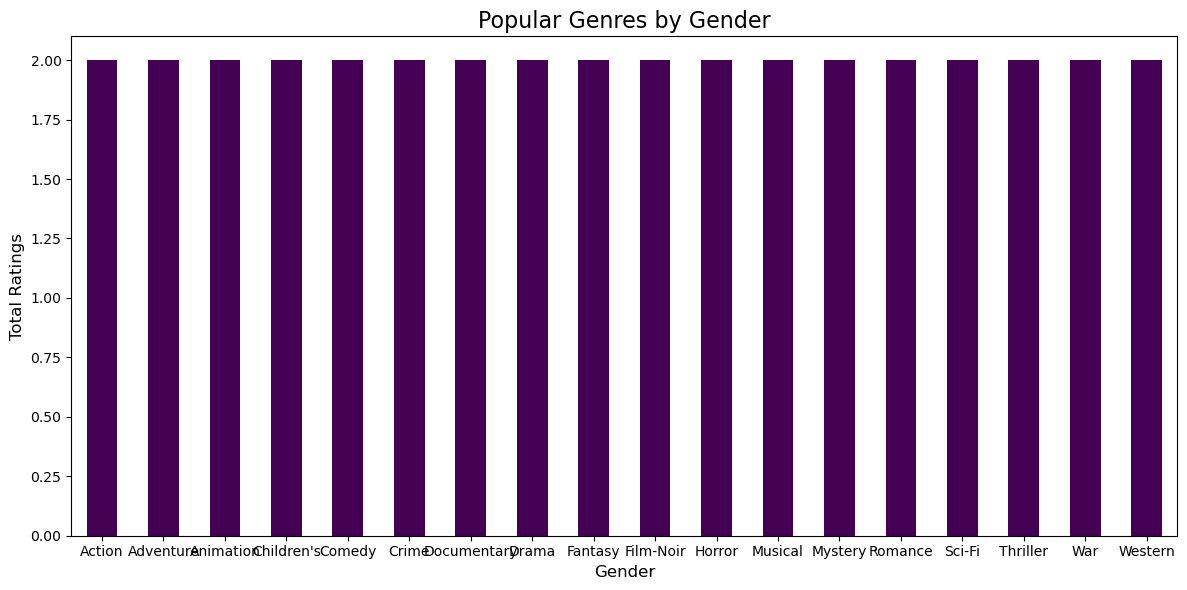

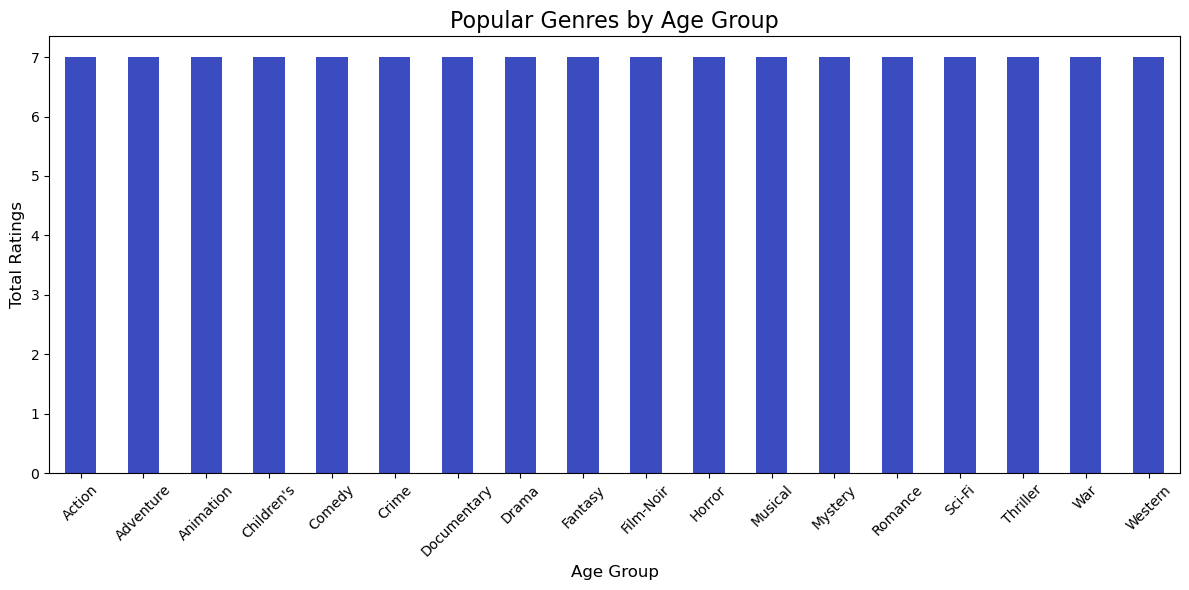

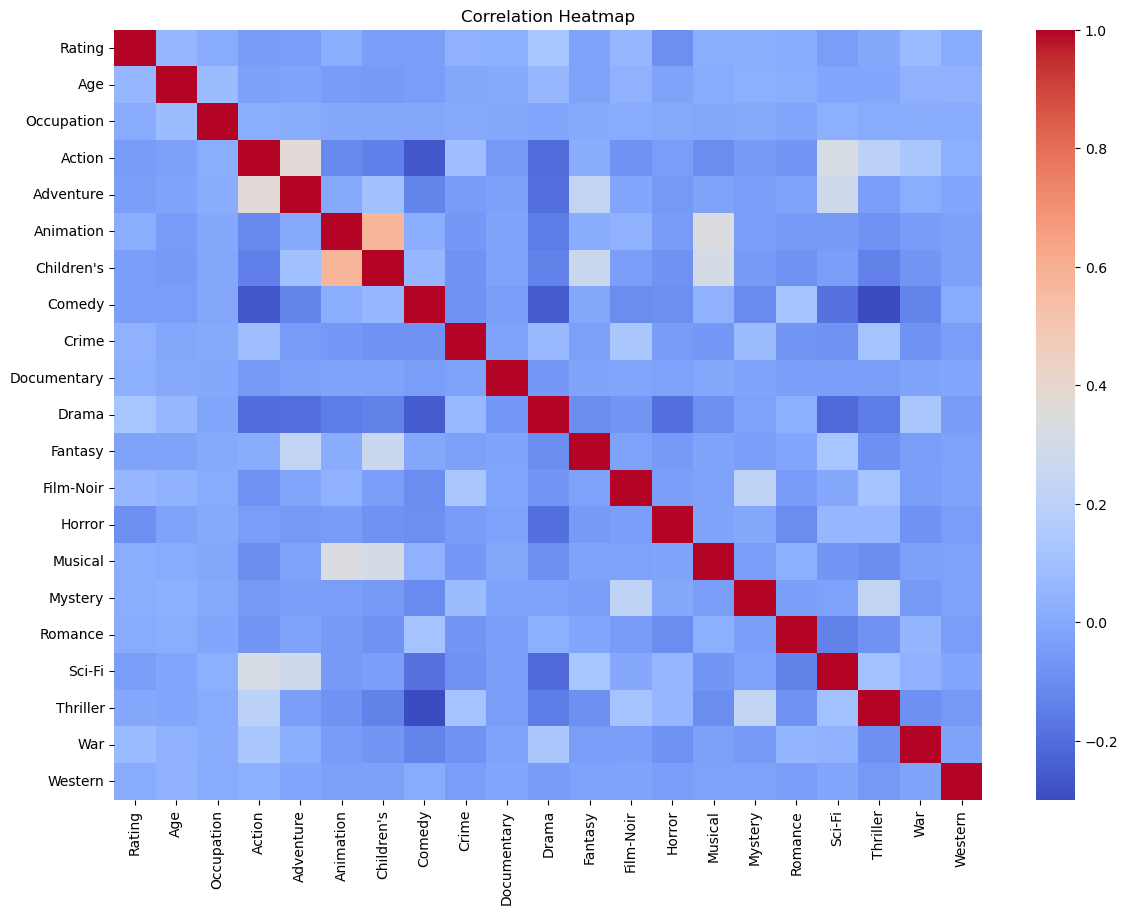

In [8]:
#Eight Solution : Dashboard Creation

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data with specified encoding
ratings = pd.read_csv(r'C:\Users\rajat\Downloads\ml-1m\ml-1m\ratings.dat', sep='::', names=['UserID', 'MovieID', 'Rating', 'Timestamp'], engine='python', encoding='ISO-8859-1')
movies = pd.read_csv(r'C:\Users\rajat\Downloads\ml-1m\ml-1m\movies.dat', sep='::', names=['MovieID', 'Title', 'Genres'], engine='python', encoding='ISO-8859-1')
users = pd.read_csv(r'C:\Users\rajat\Downloads\ml-1m\ml-1m\users.dat', sep='::', names=['UserID', 'Gender', 'Age', 'Occupation', 'ZipCode'], engine='python', encoding='ISO-8859-1')


# Step 2: Merge datasets for analysis
merged_data = pd.merge(ratings, movies, on='MovieID')
merged_data = pd.merge(merged_data, users, on='UserID')

# Extract release year from the movie title
merged_data['Year'] = merged_data['Title'].str.extract(r'\((\d{4})\)').astype(float)

# Step 3: Distribution of Ratings by Genres and Years
plt.figure(figsize=(12, 6))
genre_ratings = merged_data['Genres'].str.get_dummies('|').multiply(merged_data['Rating'], axis=0).sum()
genre_ratings.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Distribution of Ratings by Genres', fontsize=16)
plt.xlabel('Genres', fontsize=12)
plt.ylabel('Total Ratings', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Ratings by Year
plt.figure(figsize=(12, 6))
merged_data.groupby('Year')['Rating'].mean().plot(kind='line', color='orange')
plt.title('Average Ratings by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.tight_layout()
plt.show()

# Step 4: Popular Genres by User Demographics
# Gender vs Genre Preferences
plt.figure(figsize=(12, 6))
gender_genre = merged_data.groupby('Gender')['Genres'].apply(lambda x: '|'.join(x)).str.get_dummies('|').sum()
gender_genre.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Popular Genres by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Total Ratings', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Age Group vs Genre Preferences
age_groups = {1: 'Under 18', 18: '18-24', 25: '25-34', 35: '35-44', 45: '45-49', 50: '50-55', 56: '56+'}
merged_data['AgeGroup'] = merged_data['Age'].map(age_groups)
age_genre = merged_data.groupby('AgeGroup')['Genres'].apply(lambda x: '|'.join(x)).str.get_dummies('|').sum()

plt.figure(figsize=(12, 6))
age_genre.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Popular Genres by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Total Ratings', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 1: One-hot encode the 'Genres' column
genres_dummies = merged_data['Genres'].str.get_dummies('|')

# Step 2: Prepare numerical columns for correlation analysis
numerical_columns = ['Rating', 'Age', 'Occupation']
correlation_data = pd.concat([merged_data[numerical_columns], genres_dummies], axis=1)

# Step 3: Compute the correlation matrix
corr_matrix = correlation_data.corr()

# Step 4: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()



In [3]:
!pip install jupyter-dash
!pip install dash
!pip install plotly

  Obtaining dependency information for jupyter-dash from https://files.pythonhosted.org/packages/38/62/2c51aeb18c6d765c03c911e4d70f029ccb9de1a991d88cf30e362d2433c9/jupyter_dash-0.4.2-py3-none-any.whl.metadata
  Obtaining dependency information for ansi2html from https://files.pythonhosted.org/packages/bd/71/aee71b836e9ee2741d5694b80d74bfc7c8cd5dbdf7a9f3035fcf80d792b1/ansi2html-1.9.2-py3-none-any.whl.metadata


Data loaded successfully!


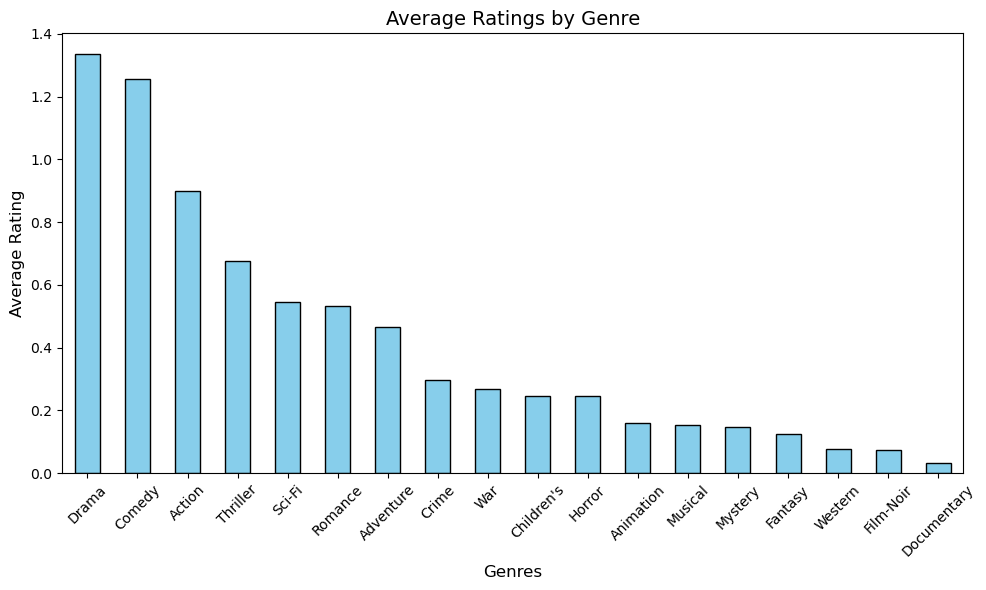

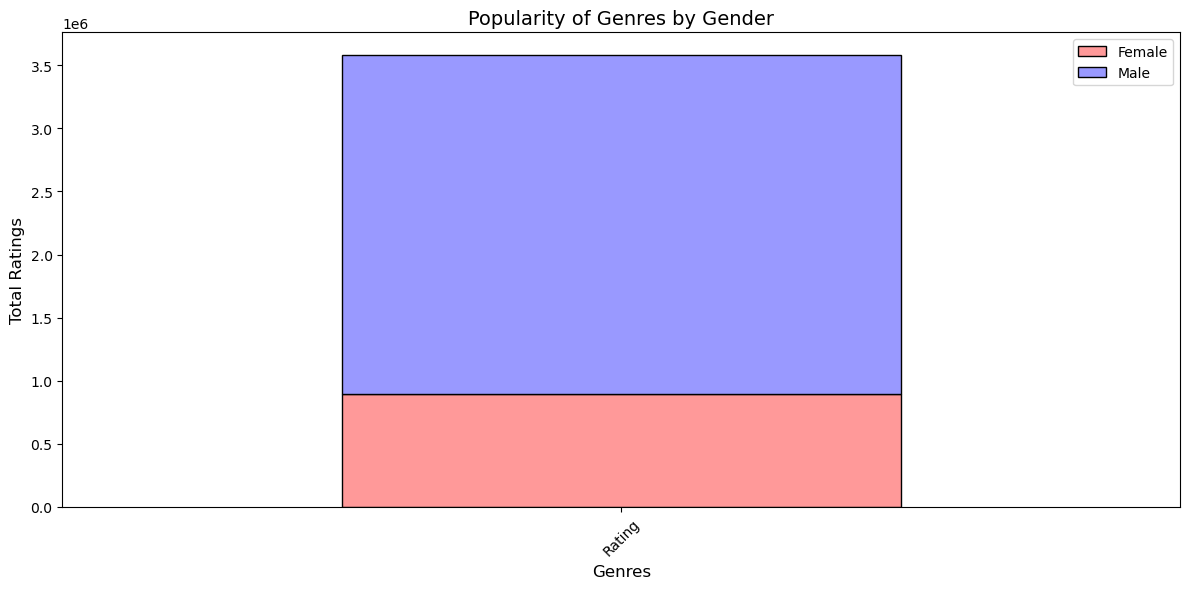

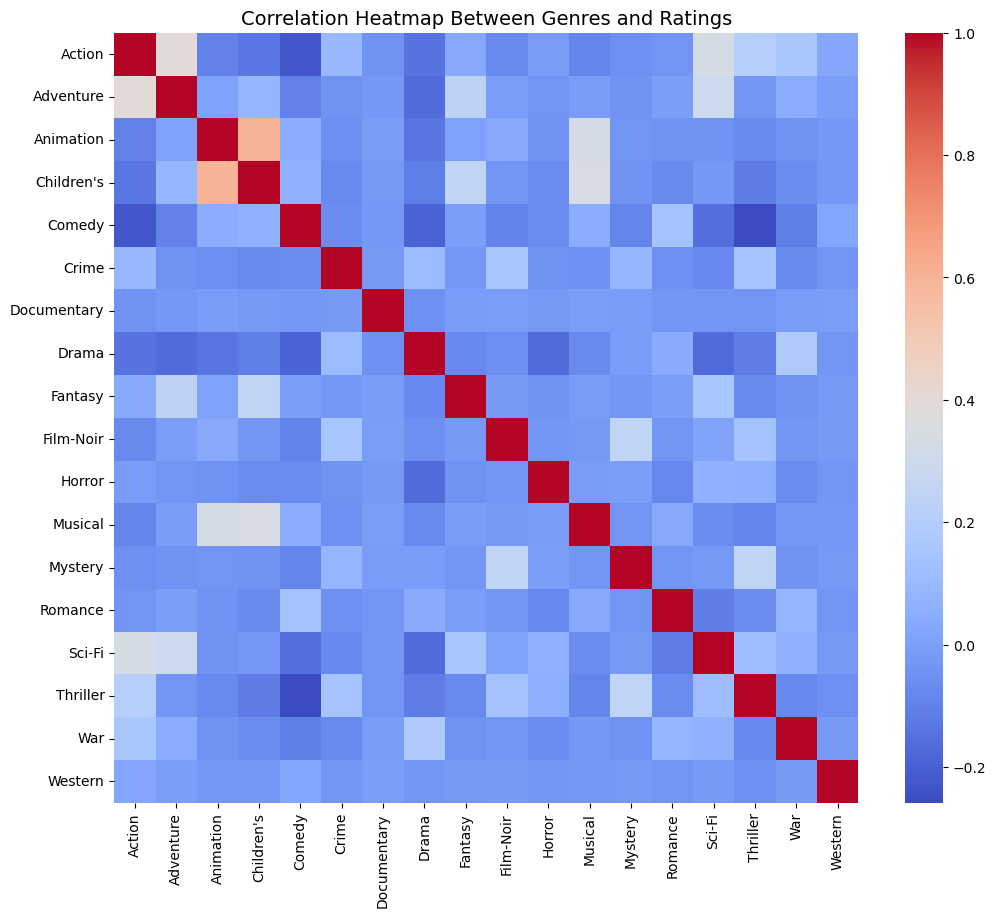

Dashboard created successfully!


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import os

def load_data():
    try:
        ratings_file = r"C:\Users\rajat\Downloads\ml-1m\ml-1m\ratings.dat"
        movies_file = r"C:\Users\rajat\Downloads\ml-1m\ml-1m\movies.dat"
        users_file = r"C:\Users\rajat\Downloads\ml-1m\ml-1m\users.dat"

        # Load data with encoding specified
        ratings = pd.read_csv(ratings_file, sep="::", names=["UserID", "MovieID", "Rating", "Timestamp"], engine="python", encoding="ISO-8859-1")
        movies = pd.read_csv(movies_file, sep="::", names=["MovieID", "Title", "Genres"], engine="python", encoding="ISO-8859-1")
        users = pd.read_csv(users_file, sep="::", names=["UserID", "Gender", "Age", "Occupation", "ZipCode"], engine="python", encoding="ISO-8859-1")

        print("Data loaded successfully!")
        return ratings, movies, users

    except Exception as e:
        print(f"Error while loading data: {e}")
        return None, None, None


def create_dashboard(ratings, movies, users):
    """
    Create a simple and minimalist dashboard for visualizing movie ratings data.
    """
    try:
        # Merge datasets
        merged_data = pd.merge(pd.merge(ratings, users, on="UserID"), movies, on="MovieID")

        # Distribution of ratings by genres
        genres_data = merged_data["Genres"].str.get_dummies("|").multiply(merged_data["Rating"], axis=0)
        genre_ratings = genres_data.sum() / genres_data.count()

        # Plot distribution of ratings by genres
        plt.figure(figsize=(10, 6))
        genre_ratings.sort_values(ascending=False).plot(kind="bar", color="skyblue", edgecolor="black")
        plt.title("Average Ratings by Genre", fontsize=14)
        plt.xlabel("Genres", fontsize=12)
        plt.ylabel("Average Rating", fontsize=12)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        # Popular genres by user demographics (Gender)
        gender_genre = merged_data.groupby(["Gender"]).sum(numeric_only=True).T
        gender_genre = gender_genre[~gender_genre.index.str.contains("UserID|MovieID|Age|Occupation|ZipCode|Timestamp")]
        gender_genre.plot(kind="bar", figsize=(12, 6), stacked=True, color=["#FF9999", "#9999FF"], edgecolor="black")
        plt.title("Popularity of Genres by Gender", fontsize=14)
        plt.xlabel("Genres", fontsize=12)
        plt.ylabel("Total Ratings", fontsize=12)
        plt.legend(["Female", "Male"])
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        # Heatmap: Correlation between Genres, User Activity, and Ratings
        genres_corr = genres_data.corr()
        plt.figure(figsize=(12, 10))
        sns.heatmap(genres_corr, annot=False, cmap="coolwarm", cbar=True)
        plt.title("Correlation Heatmap Between Genres and Ratings", fontsize=14)
        plt.show()

        print("Dashboard created successfully!")

    except Exception as e:
        print(f"Error while creating the dashboard: {e}")


def main():
    """
    Main function to load data and create the dashboard.
    """
    ratings, movies, users = load_data()
    if ratings is not None and movies is not None and users is not None:
        create_dashboard(ratings, movies, users)
    else:
        print("Dashboard could not be created due to errors in data loading.")


if __name__ == "__main__":
    main()
